# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Twitter Sentiment Classification

The data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.


**Class Description**

2 News: the tweet links to factual news about climate change.

1 Pro: the tweet supports the belief of man-made climate change.

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change.

-1 Anti: the tweet does not believe in man-made climate change Variable definitions.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense
import time

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv('test_with_no_labels.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


https and name of the handle in the message in data cleaning so that we will be left with the actual message......Still need to be  done

In [15]:
df_train['count']=df_train['message'].str.split().str.len()
df_train


,sentiment,message,tweetid,count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22
15815,2,RT @washingtonpost: How climate change could b...,17856,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21


In [5]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [8]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


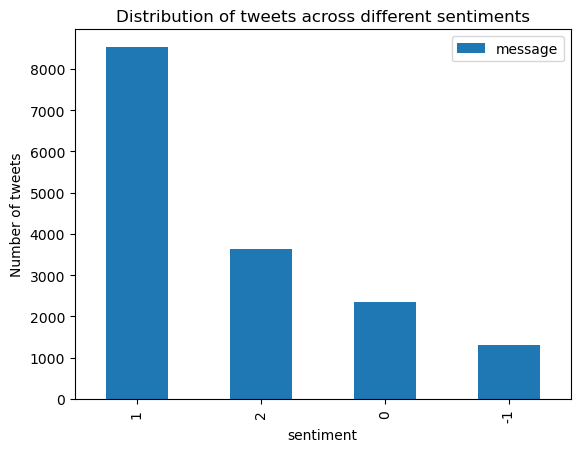

In [18]:
countv= df_train[['sentiment', 'message']].groupby('sentiment').count()
countv.sort_values('message', ascending=False).plot(kind='bar')
plt.title('Distribution of tweets across different sentiments')
plt.ylabel('Number of tweets')
plt.show()

**Observation:** Most tweets came from those who supports the belief of man-made climate change, followed by the tweet links to factual news about climate change . Meanwhile, least tweets does not believe in man-made climate change Variable definitions.

In [21]:
Pro=df_train[df_train['sentiment']==1]
News=df_train[df_train['sentiment']==2]
Neutral=df_train[df_train['sentiment']==0]
Anti=df_train[df_train['sentiment']==-1]

<AxesSubplot:>

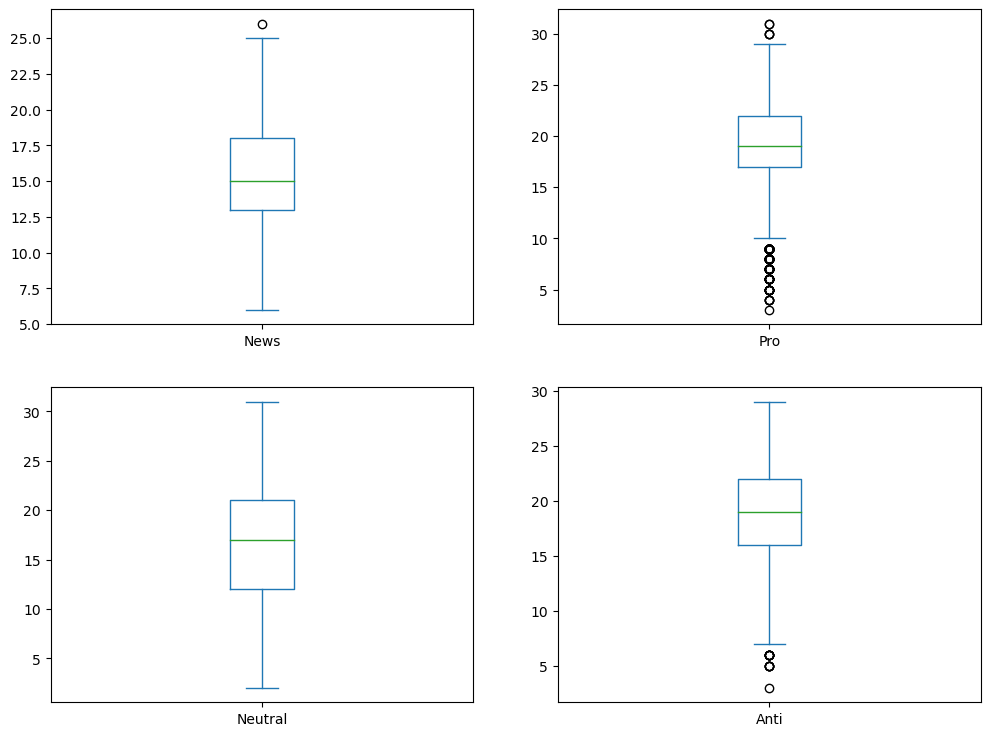

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
News['count'].plot(kind='box', ax=ax[0,0], label='News')
Pro['count'].plot(kind='box', ax=ax[0,1], label='Pro')
Neutral['count'].plot(kind='box', ax=ax[1,0], label='Neutral')
Anti['count'].plot(kind='box', ax=ax[1,1], label='Anti')

<AxesSubplot:ylabel='Density'>

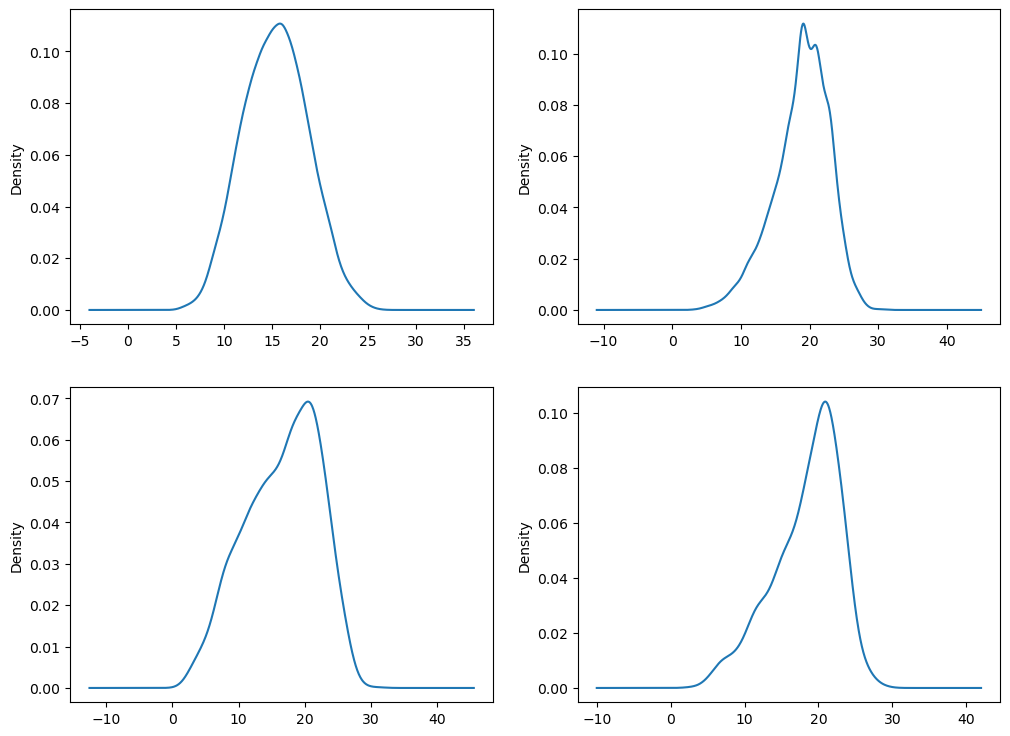

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
News['count'].plot(kind='density', ax=ax[0,0], label='News')
Pro['count'].plot(kind='density', ax=ax[0,1], label='Pro')
Neutral['count'].plot(kind='density', ax=ax[1,0], label='Neutral')
Anti['count'].plot(kind='density', ax=ax[1,1], label='Anti')

**Between box plot and density plot which one is the best? Also, which ngram_range will be the best for our project and why?**

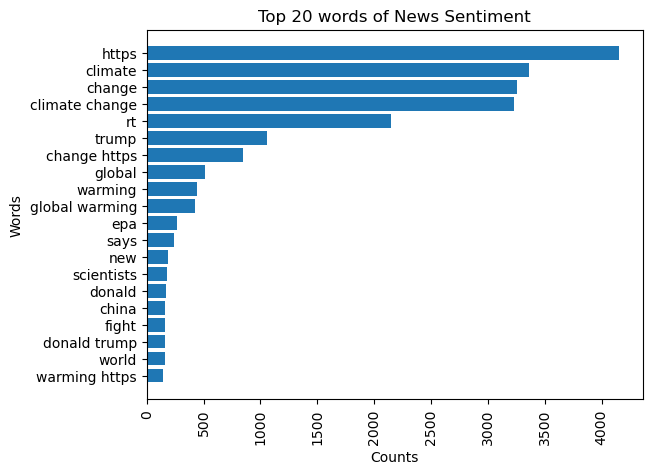

In [24]:
vect_news = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
News_fit=vect_news.fit_transform(News['message'].values.astype(str))
News_Names=vect_news.get_feature_names_out()
News_counts=News_fit.toarray().sum(axis=0)


sorted_indices = News_counts.argsort()
sorted_words = [News_Names[i] for i in sorted_indices]
sorted_counts = News_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts )
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of News Sentiment')
plt.show()

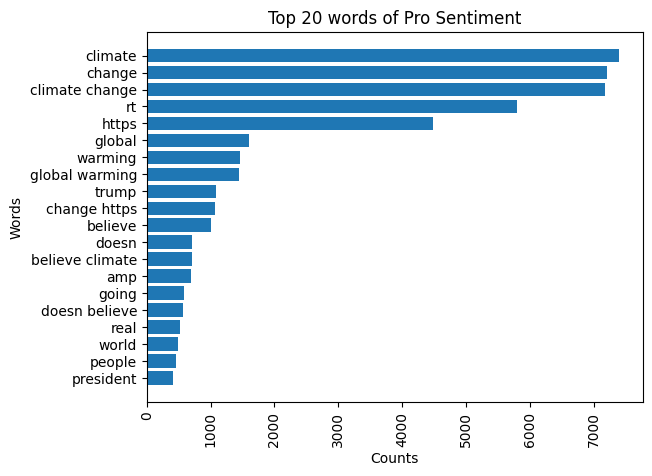

In [ ]:
vect_Pro = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
Pro_fit = vect_Pro.fit_transform(Pro['message'].values.astype(str))
Pro_Names=vect_Pro.get_feature_names_out()
Pro_counts=Pro_fit.toarray().sum(axis=0)

sorted_indices = Pro_counts.argsort()
sorted_words = [Pro_Names[i] for i in sorted_indices]
sorted_counts = Pro_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Pro Sentiment')
plt.show()

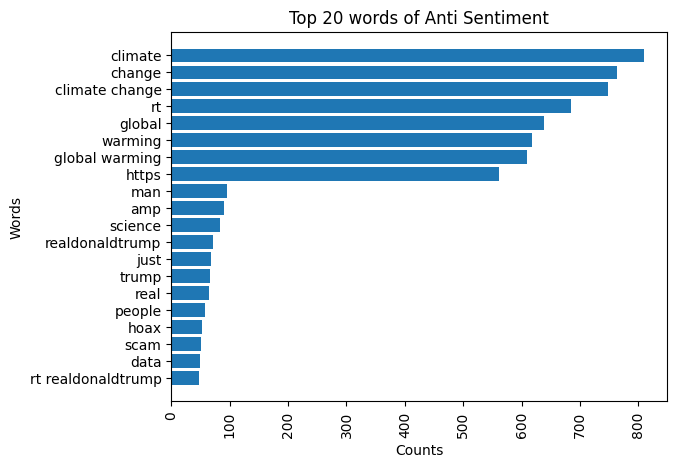

In [ ]:
vect_Anti = CountVectorizer(lowercase=True, stop_words='english',  max_features=20, analyzer='word', ngram_range=(1, 2))
Anti_fit = vect_Anti.fit_transform(Anti['message'].values.astype(str))
Anti_Names=vect_Anti.get_feature_names_out()
Anti_counts=Anti_fit.toarray().sum(axis=0)

sorted_indices = Anti_counts.argsort()
sorted_words = [Anti_Names[i] for i in sorted_indices]
sorted_counts = Anti_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Anti Sentiment')
plt.show()

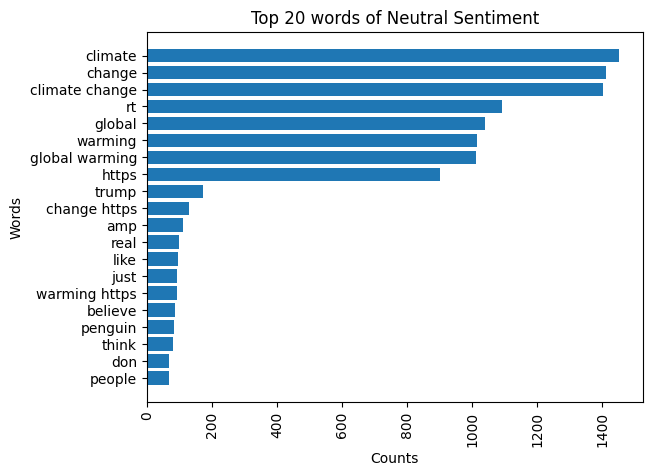

In [ ]:
vect_Neutral = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
Neutral_fit=vect_Neutral.fit_transform(Neutral['message'].values.astype(str))
Neutral_Names=vect_Neutral.get_feature_names_out()
Neutral_counts=Neutral_fit.toarray().sum(axis=0)

sorted_indices = Neutral_counts.argsort()
sorted_words = [Neutral_Names[i] for i in sorted_indices]
sorted_counts = Neutral_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Neutral Sentiment')
plt.show()

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

vect_Neutral = CountVectorizer(lowercase=True, stop_words='english', max_features=100, analyzer='word', ngram_range=(1, 2))
Neutral_fit = vect_Neutral.fit_transform(Neutral['message'].values.astype(str))
Neutral_Names = vect_Neutral.get_feature_names_out()
Neutral_counts = Neutral_fit.toarray().sum(axis=0)

wordcloud_data = {word: count for word, count in zip(Neutral_Names, Neutral_counts)}

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(wordcloud_data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [27]:
df_train.isnull().sum() #check the number of missing values (null) in each column of the DataFrame

sentiment    0
message      0
tweetid      0
count        0
dtype: int64

In [30]:
df_test.isnull().sum() #check the number of missing values (null) in each column of the DataFrame

message    0
tweetid    0
dtype: int64

In [35]:
def remove_noise(text):
    #Replace URLs with 'url'
    text=re.sub(r'http[s]?://(?:[A-Za-z]|([0-9]|[$-@.&+]|[!*\ (\ ),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+','http',text)
    #Replace Twitter handles with 'user'
    text=re.sub(r'@\w+','',text)
    #Remove hashtags using regular expression
    text=re.sub(r'#\w+','',text)
    #Replace special characters with a space
    text=re.sub(r'[^ZA-Z\s]','',text)
    #Remove extra whitespaces
    text=re.sub(r'\s+','',text).strip()
    #Cnovert to lowercase
    text=text.lower()
    #Remove Stopwords
    stop_words=set(stopwords.words('english'))
    text=''.join(word for word in text.split() if word not in stop_words)
    #lemmatizer words
    lemmatizer = wordsnetlemmatizer()
    text=''.join(lemmatizer.lemmatizer(word) for word in text.split())
    return text

**Important information to consider**
DANIEL SUGGESTS THAT WE USE DOWNSAMPLING BECAUSE UPSAMPLING CAUSES OVERFITTING!!!!
Also Variable selection to reduce the number of features that we have......

In [36]:
len(Pro)/2 #calculate the length of a variable and divide it by 2

4265.0

**Masking Sentiments into Four classes**

In [39]:
#Masking the Pro Sentiment
Pro=df_train[df_train['sentiment']==1]
#Masking the New Sentiment
News=df_train[df_train['sentiment']==2]
#Masking the Neutral Sentiment
Neutral=df_train[df_train['sentiment']==0]
#Masking the Anti Sentiment
Anti=df_train[df_train['sentiment']==-1]

**Downsamlping the Pro sentiment:**

In [40]:
Pro_down= resample(Pro,
                    replace=False, # sample with replacement (we need to duplicate observations)
                    n_samples=4265, # match number in minority class
                    random_state=27)

**Upsampling the News sentiment:**

In [41]:
News_up = resample(News,
                   replace=True, # sample with replacement (we need to duplicate observations)
                   n_samples=4265, # match number in minority class
                   random_state=27)

**Upsampling the Neutral sentiment:**

In [42]:
Neutral_upsampled = resample(Neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=4265, # match number in minority class
                          random_state=27)

**Upsampling the Anti sentiment:**

In [43]:
Anti_upsampled = resample(Anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=4265, # match number in minority class
                          random_state=27)

**Joining resampled sentiments**

In [44]:
X = pd.concat([Anti_upsampled, Neutral_upsampled, News_up, Pro_down])

In [45]:
y=X['sentiment']

**Natural Langauge Processing using Countvectorizer**

In [46]:
#Building a CountVectorizer
vect_Pro = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 2))
#Fitting and Transforming the data
X= vect_Pro.fit_transform(X['message'].values.astype(str))

In [47]:
import pickle
pickle.dump(vect_Pro, open( "vect_Pro.pkl", "wb" ))

**Feature selection**



In [48]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=50000)

# Transform (i.e.: run selection on) the training data
X= selector_kbest.fit_transform(X, y)

How many features do we really need and why?

In [49]:
X.shape

(17060, 50000)

**Spliting the data**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

**LOGISTIC REGRESSION MODEL**

In [ ]:
# #Building the logistic Regression Model
# lr=LogisticRegression()
# #Fitting Logistics regression model
# lr.fit(X_train, y_train)

In [ ]:
# #Predicting on the testing data
# test_preds=lr.predict(X_test)
# #Predicting on the training data
# train_preds=lr.predict(X_train)

In [ ]:
# print(classification_report(y_train, train_preds))

In [ ]:
# print(classification_report(y_test, test_preds))

**DECISION TREE CLASSIFIER**

In [ ]:
# #Building the  Decision Tree Classifier Model
# dtc=DecisionTreeClassifier(max_depth=7)
# #Fitting Decision Tree  Classifier model
# dtc.fit(X_train, y_train)

In [ ]:
# #Predicting on the testing data
# test_preds=dtc.predict(X_test)
# #Predicting on the training data
# train_preds=dtc.predict(X_train)

In [ ]:
# print(classification_report(y_train, train_preds))

In [ ]:
# print(classification_report(y_test, test_preds))

**RANDOM FOREST CLASSIFIER**

In [ ]:
# #Building the Random Forest Classifer Model
# rfc=RandomForestClassfier(max_depth=3, n_estimators=100)
# #Fitting Random forest classifier model
# rfc.fit(X_train, y_train)

In [ ]:
# #Predicting on the testing data
# test_preds=rfc.predict(X_test)
# #Predicting on the training data
# train_preds=rfc.predict(X_train)

In [ ]:
# print(classification_report(y_train, train_preds))

In [ ]:
# print(classification_report(y_test, test_preds))

**KNN Classifier**

In [ ]:
# n_neighbors = 100

# #Building the Model
# knn = KNeighborsClassifier(n_neighbors)
# # Fit the model
# knn.fit(X_train, y_train)

In [ ]:
# # Get predictions on the test set
# y_hat = knn.predict(X_test)
# # Calculate the loss
# print(classification_report(y_test, y_hat))

In [ ]:
# print(classification_report(y_train, knn.predict(X_train)))

**Support Vector Machine**

In [ ]:
# svc = SVC(kernel='rbf')
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# print(classification_report(y_train, svc.predict(X_train)))

In [ ]:
# import pickle
# pickle.dump(svc, open( "svc.pkl", "wb" ))

**Neural Network**

In [ ]:
# model = Sequential()
# model.add(Dense(89155, activation='relu'))
# model.add(Dense(60, activation='softmax'))
# model.add(Dense(60, activation='softmax'))
# model.add(Dense(4, activation='softmax'))

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=100)


In [ ]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

**Building All classifiers**

In [ ]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'RBF SVM',
         'Decision Tree', 'Random Forest']

In [ ]:
classifiers = [
    LogisticRegression(C=1),
    KNeighborsClassifier(10),
    SVC(kernel="rbf", gamma=2, C=0.025),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

In [ ]:
results_train = []
results_test=[]

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):

    #Fitting the models and recording the time
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    #Start time
    start_time = time.time()
    #Predicting on y_train using X_train
    y_pred = clf.predict(X_train)
    #End time
    end_time = time.time()
    #Execution Time
    train_execution_time = end_time - start_time

    #Start time
    start_time = time.time()
    #Predicting on y_train using X_train
    y_pred_test = clf.predict(X_test)
    #End time
    end_time = time.time()
    #Execution Time
    test_execution_time = end_time - start_time

    #Calculating the accuracy score of the training data
    accuracy_train = accuracy_score(y_train, y_pred)
    #Calculating the precision score of the training data
    precision_train = precision_score(y_train, y_pred, average='micro')
    #Calculating the recall score of the training data
    recall_train = recall_score(y_train, y_pred, average='micro')
    #Calculating the f1 score of the training data
    f1_train = f1_score(y_train, y_pred, average='micro')


    #Calculating the accuracy score of the testing data
    accuracy_test = accuracy_score(y_test, y_pred_test)
    #Calculating the precision score of the testing data
    precision_test = precision_score(y_test, y_pred_test, average='micro')
    #Calculating the recall score of the testing data
    recall_test = recall_score(y_test, y_pred_test, average='micro')
    #Calculating the F1 score of the testing data
    f1_test   = f1_score(y_test, y_pred_test, average='micro')

    # Save the results to dictionaries
    models[name]=clf
    #Confusion on the training data
    confusion[name] = confusion_matrix(y_train, y_pred)
    #Confusion on testing data
    confusion[name] = confusion_matrix(y_test, y_pred_test)
    #Classification report of the training data
    class_report[name] = classification_report(y_train, y_pred)
    #Classification report of the testing data
    class_report[name] = classification_report(y_test, y_pred_test)

    # Appending the name of the model, training data  results and fitting time of each model
    results_train.append([name, accuracy_train, precision_train, recall_train, f1_train, run_time.best, test_execution_time])
    # Appending the name of the model and  testing data  results
    results_test.append([name, accuracy_test, precision_test, recall_test, f1_test, train_execution_time])

#Converting the training results to a dataframe
results_train= pd.DataFrame(results_train, columns=['Classifier', 'Accuracy Train', 'Precision Train', 'Recall', 'F1 Train', 'Train Time', 'predicting time'])
results_train.set_index('Classifier', inplace= True)

#Converting the Testing data into a Dataframe
results_test= pd.DataFrame(results_test, columns=['Classifier', 'Accuracy Test', 'Precision  Test', 'Recall  Test', 'F1 Test', "Predicting time" ])
results_test.set_index('Classifier', inplace= True)


In [ ]:
results_train

In [ ]:
results_test

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

Besides accuracy, f1 score, precision and recall, also consider the training time????maybe ###un_time = %timeit -q -o knn.fit(X_train, y_train)

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic